In [1]:
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [7]:
def query_data(query):
    """
    Function to query data from the database using sqlalchemy
    :param query: 
    :return: pd.DataFrame
    
    Connection parameters:
    user = readmyzone
    password = (get from environment variable MYSQL_PASSWORD)
    host = 192.168.2.7
    port = 3306
    """
    
    # Create the connection string
    user = 'readmyzone'
    password = os.environ.get('MYSQL_PASSWORD')
    host = '192.168.2.7'
    port = '3306'
    db = 'myzone'
    connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{db}'
    
    # Create the engine
    engine = create_engine(connection_string)
    
    try:
        # Query the data
        data = pd.read_sql(query, engine)
    except Exception as e:
        print(e)
        data = None
    
    return data

# Load the data

In [8]:
sav_incidencias = query_data('SELECT * FROM sav_incidencias')
sav_piezas = query_data('SELECT * FROM sav_piezas')
sav_estados = query_data('SELECT * FROM sav_estados')
sav_incidencias_tipo = query_data('SELECT * FROM sav_incidencias_tipo')

In [9]:
dataset = sav_incidencias.merge(sav_piezas, left_on='codigo', right_on='codigo_incidencia', how='left', suffixes=(None, '_pieza'))
dataset = dataset.merge(sav_estados, left_on='estado', right_on='id', how='left', suffixes=(None, '_estado'))
dataset = dataset.merge(sav_incidencias_tipo, left_on='tipo', right_on='id', how='left', suffixes=(None, '_tipo'))

In [10]:
clean_dataset = dataset[(dataset["tipo"] == 1) & (dataset["estado"].isin([2,6]))]

In [11]:
dataset_incidencias = sav_incidencias.merge(sav_estados, left_on='estado', right_on='id', how='left', suffixes=(None, '_estado'))
dataset_incidencias = dataset_incidencias.merge(sav_incidencias_tipo, left_on='tipo', right_on='id', how='left', suffixes=(None, '_tipo'))

# EDA

In [12]:
dataset.head(50)

,id,web_id,codigo,creation_date,modification_date,company_id,user_id,ref_cliente,portes_airzone,devaluacion,...,titulo_en,titulo_fr,titulo_it,titulo_pt,id_tipo,titulo_es_tipo,titulo_en_tipo,titulo_fr_tipo,titulo_it_tipo,titulo_pt_tipo
0,47,1,AZYZAJEUE0,2015-04-21 11:28:47,2015-04-29 13:35:50,67,118.0,5000333,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
1,49,1,YZ2YZZUU16,2015-04-27 09:32:18,2015-05-28 06:55:45,498,128.0,CENTRAL ALARMAS,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
2,5,1,Y52FA5OT97,2015-03-10 17:49:28,2015-04-16 16:51:24,26,67.0,21406866,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
3,6,1,YPQXAZIYD6,2015-03-10 18:34:05,2015-04-16 16:47:08,26,67.0,Termostato tacto Jose,0,0,...,Closed,Fermée,Chiusa,None,3.0,reparacion,repair,reparation,riparazione,None
4,50,1,ZP2CZZYVBD,2015-04-27 09:51:49,2015-06-03 09:09:08,499,117.0,SPLITMANIA JEREZ-ANTONIO GARCIA PADILLA,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
5,63,1,ZJAFAPUT58,2015-05-12 15:35:37,2015-05-13 16:29:22,497,135.0,11503687,0,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
6,46,1,YPUEA5WZ10,2015-04-20 14:44:57,2015-05-28 06:21:09,498,128.0,REPARACION MODULO PERSIANA,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
7,89,1,YJECZZEZ33,2015-05-25 09:35:22,2015-06-15 09:24:58,499,117.0,PDH150042_DEVOLUCION,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
8,89,1,YJECZZEZ33,2015-05-25 09:35:22,2015-06-15 09:24:58,499,117.0,PDH150042_DEVOLUCION,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
9,51,1,ZPWBA5ETF7,2015-04-27 14:49:58,2015-05-13 16:33:58,497,135.0,"REJILLA DE JESUS VELASCO, SPLITMANIA HUELVA",1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None


In [13]:
groupby = dataset.groupby(["titulo_es_tipo","titulo_es"]).size().rename('count').reset_index()
groupby["%"] = groupby["count"] / groupby["count"].sum() * 100
groupby

,titulo_es_tipo,titulo_es,count,%
0,devolucion,Abierta,220,0.244170
1,devolucion,Anulada,4479,4.971088
2,devolucion,Cerrada,27986,31.060699
3,devolucion,R.Tramitada,1125,1.248599
4,devolucion,R.Validada,556,0.617085
5,devolucion,Validada,126,0.139843
6,garantia,Abierta,61,0.067702
7,garantia,Anulada,2065,2.291872
8,garantia,Cerrada,42803,47.505577
9,garantia,R.Tramitada,1872,2.077668


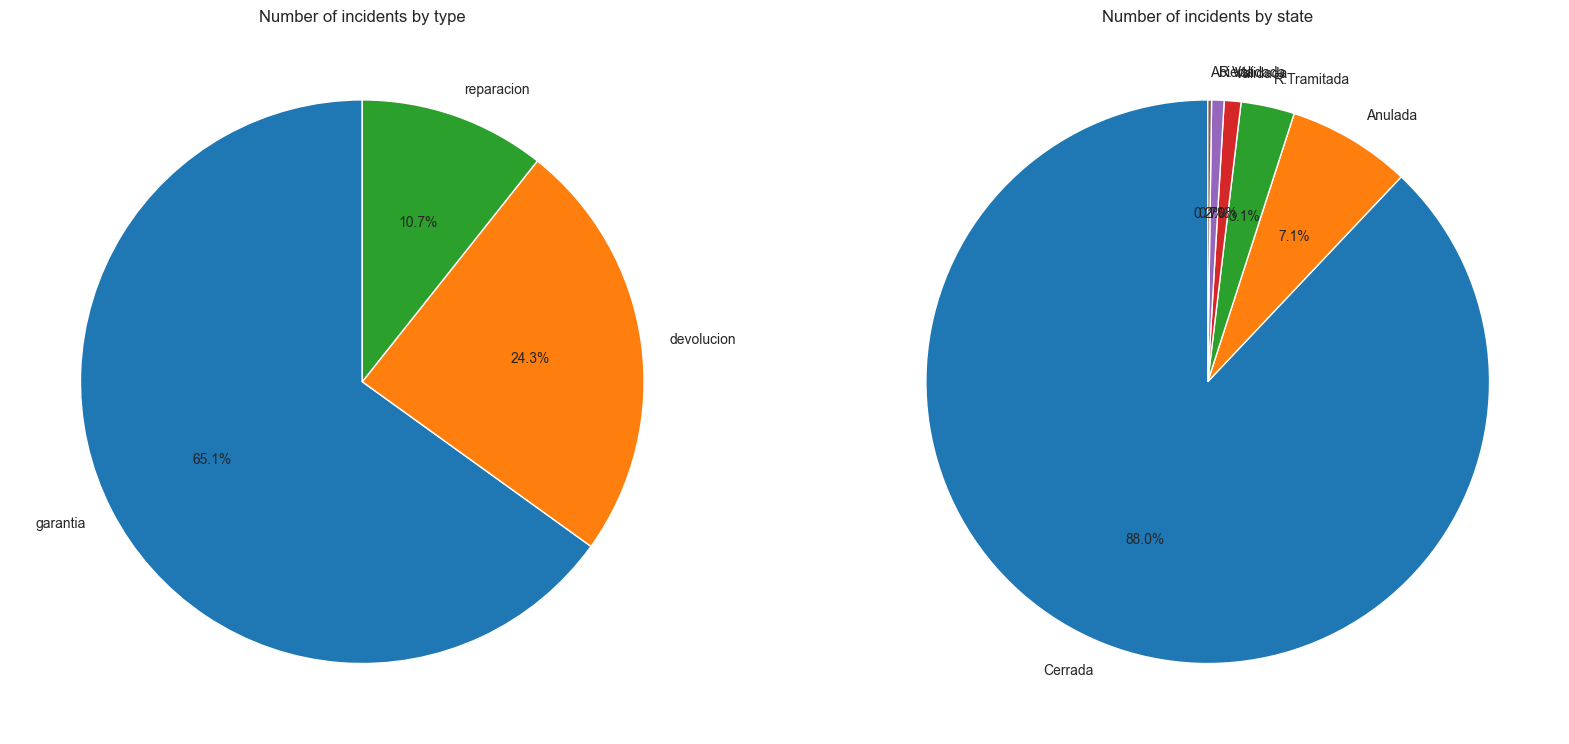

In [14]:
group_inc_tipo = dataset_incidencias.groupby("titulo_es_tipo").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False)
group_inc_estado = dataset_incidencias.groupby("titulo_es").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False)

# Create a subplot and plot both graphs in the same figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].pie(group_inc_tipo["count"], labels=group_inc_tipo.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Number of incidents by type")
axs[1].pie(group_inc_estado["count"], labels=group_inc_estado.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Number of incidents by state")
plt.show()

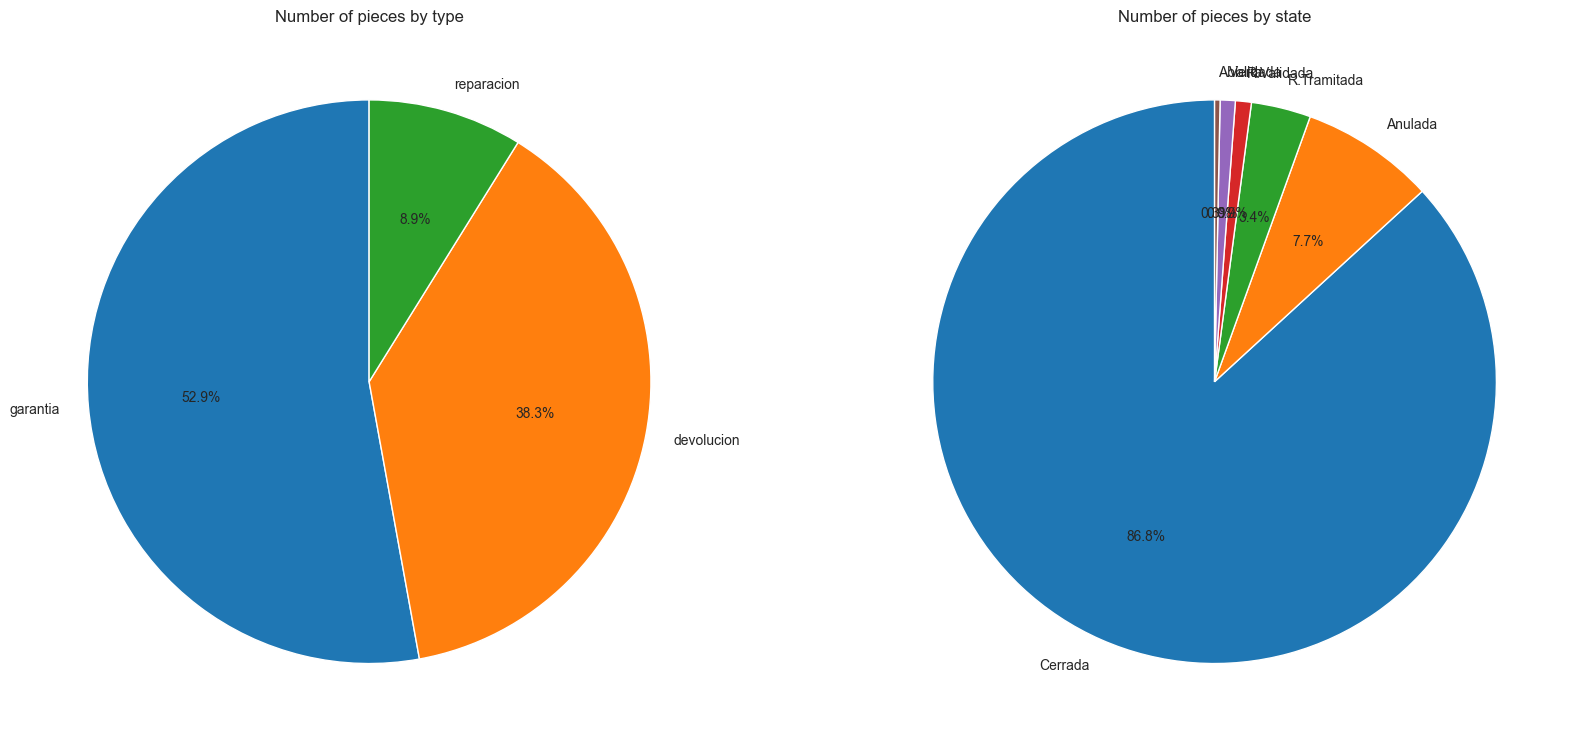

In [15]:
group_pieces_tipo = dataset.groupby("titulo_es_tipo").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False)
group_pieces_estado = dataset.groupby("titulo_es").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False)

# Create a subplot and plot both graphs in the same figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].pie(group_pieces_tipo["count"], labels=group_pieces_tipo.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Number of pieces by type")
axs[1].pie(group_pieces_estado["count"], labels=group_pieces_estado.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Number of pieces by state")
plt.show()

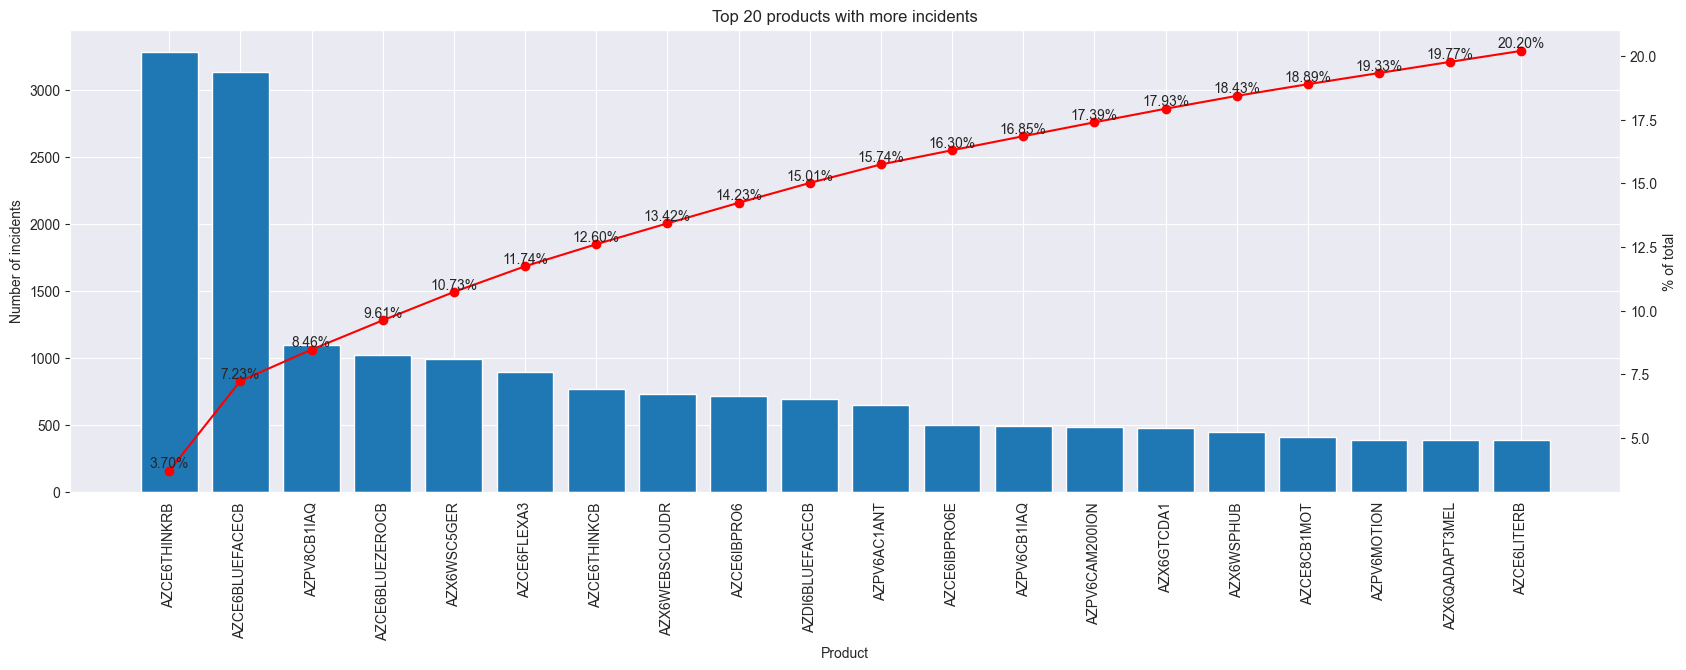

In [17]:
# Plot the X products with more incidents
X = 20
group_articulo = clean_dataset.groupby("cod_articulo").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False).head(X)
group_articulo["cumsum"] = group_articulo["count"].cumsum()
group_articulo["%"] = group_articulo["cumsum"] / dataset.groupby("cod_articulo").size().sum() * 100

# Plot the number of incidents
plt.figure(figsize=(20, 6))
plt.bar(group_articulo.index, group_articulo["count"], zorder=2)
plt.ylabel("Number of incidents")
plt.xlabel("Product")
plt.grid(zorder=0)
plt.xticks(rotation=90)

# Plot the % of total
plt.twinx()
plt.plot(group_articulo.index, group_articulo["%"], color='red', marker='o', zorder=3)
for i in range(X):
    plt.text(group_articulo.index[i], group_articulo["%"].iloc[i], f"{group_articulo['%'].iloc[i]:.2f}%", ha='center', va='bottom')
plt.title(f"Top {X} products with more incidents")
plt.grid(False)
plt.ylabel("% of total")
plt.show()

# Data preprocessing (Translating the text fields)

In [18]:
from deep_translator import GoogleTranslator
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [19]:
fields_to_translate = ["desc_problema", "problema", "descripcion"]
text_to_translate = {}

# text_to_translate = clean_dataset[fields_to_translate]
for field in fields_to_translate:
    text_to_translate[field] = pd.DataFrame(clean_dataset[field].unique(), columns=[field])

In [16]:
# Detect language of the texts
def detect_language(text):
    if len(str(text)) < 5:
        return "Too short"
    
    try:
        return 'es' if str(text) == '' else detect(str(text).lower())
    except Exception as e:
        return "Error"

for field in fields_to_translate:
    text_to_translate[field][f"{field}_lg"] = text_to_translate[field][field].apply(detect_language)

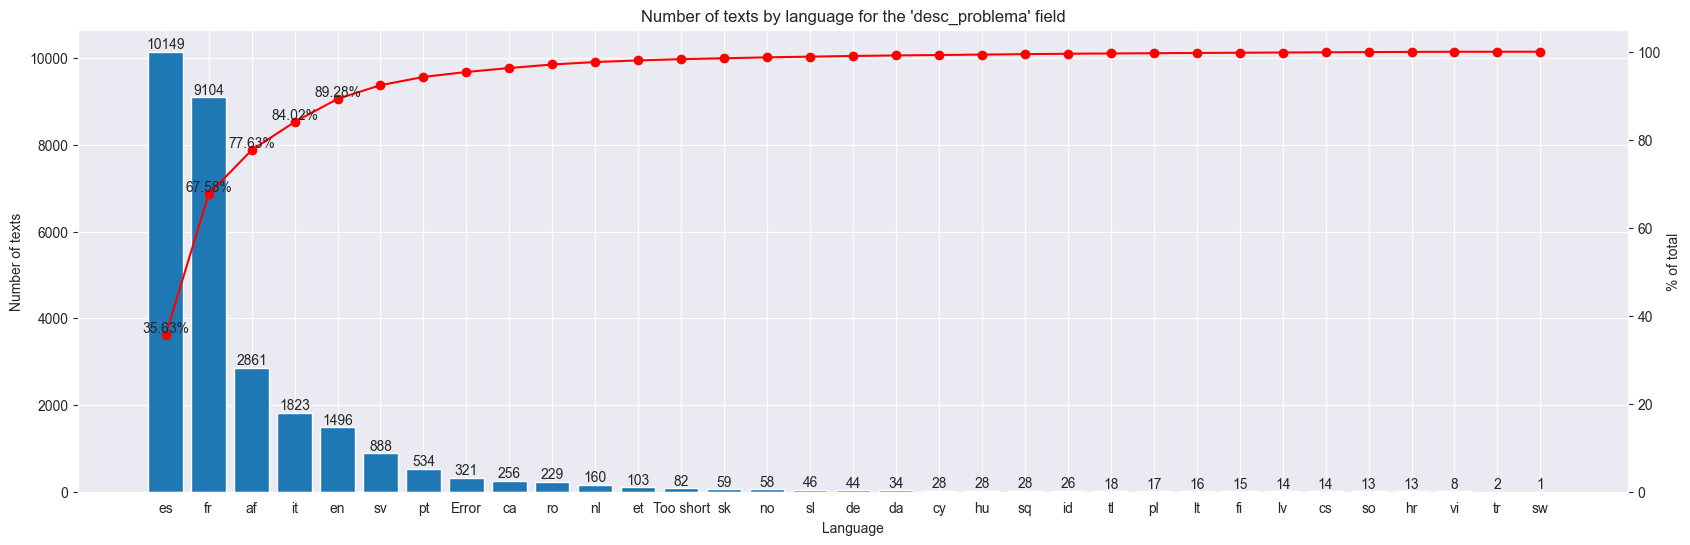

In [25]:
# Plot the number of texts by language
lang = text_to_translate["desc_problema"]["desc_problema_lg"].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(lang.index, lang.values, zorder=2)
for i in range(len(lang)):
    plt.text(lang.index[i], lang.values[i], lang.values[i], ha='center', va='bottom', zorder=2)
plt.ylabel("Number of texts")
plt.xlabel("Language")
plt.title("Number of texts by language for the 'desc_problema' field")
plt.grid(zorder=0)
plt.twinx()
plt.plot(lang.index, lang.cumsum() / lang.sum() * 100, color='red', marker='o', zorder=2)
plt.grid(False)
for i in range(5):
    plt.text(lang.index[i], lang.cumsum().iloc[i] / lang.sum() * 100, f"{lang.cumsum().iloc[i] / lang.sum() * 100:.2f}%", ha='center', va='bottom', zorder=2)
plt.ylabel("% of total")
plt.ylim(0, 105)
plt.show()

In [45]:
aux = 0
for text in text_to_translate.keys():
    print(f"Lenght of filtered dataframe: {len(text_to_translate[text][~text_to_translate[text][f'{text}_lg'].isin(['es','Error','Too short'])])}")
    aux += text_to_translate[text][~text_to_translate[text][f'{text}_lg'].isin(['es','Error','Too short'])][text].apply(lambda x: len(str(x))).sum()
print(f"Total number of characters to translate: {aux}")

Lenght of filtered dataframe: 17936
Lenght of filtered dataframe: 19530
Lenght of filtered dataframe: 9853
Total number of characters to translate: 2145996


In [68]:
# Save in disk the text to translate dictionary to avoid reprocessing
for text in text_to_translate.keys():
    text_to_translate[text].to_csv(f"{text}.csv", sep='¬', encoding='utf-8-sig', index=False)

In [20]:
# Load from disk the text to translate dictionary
text_to_translate = {}
for text in fields_to_translate:
    text_to_translate[text] = pd.read_csv(f"{text}.csv", sep='¬', encoding='utf-8-sig')

C:\Users\voliveira\AppData\Local\Temp\ipykernel_21052\800894653.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  text_to_translate[text] = pd.read_csv(f"{text}.csv", sep='¬', encoding='utf-8-sig')
C:\Users\voliveira\AppData\Local\Temp\ipykernel_21052\800894653.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  text_to_translate[text] = pd.read_csv(f"{text}.csv", sep='¬', encoding='utf-8-sig')
C:\Users\voliveira\AppData\Local\Temp\ipykernel_21052\800894653.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this 

In [92]:
from tqdm import tqdm

def translate_in_batches(df, columns_to_translate, batch_size=10):
    """
    Function to translate the text in batches.
    It uses the Google Translator API to translate the text.
    It writes the translated text to a csv file.
    :param df: dataframe with the text to translate
    :param columns_to_translate: columns to translate
    :param batch_size: size of the batch to translate
    :return: None
    """
    for column in columns_to_translate:
        total_rows = len(df)
        with tqdm(total=total_rows) as pbar:
            for i in range(0, total_rows, batch_size):
                batch = df.iloc[i:i+batch_size][column].tolist()
                try:
                    translations = GoogleTranslator(source='auto', target='es').translate_batch(batch)
                    # Test if csv file exists, if not created it and add the translated text to it
                    if not os.path.exists(f'{column}_trasnlated.csv'):
                        pd.DataFrame({
                            column: batch,
                            f'{column}_translated': translations
                        }).to_csv(f'{column}_translated.csv', mode='a', index=False, sep='¬', encoding='utf-8-sig', lineterminator='\n')
                    else:
                        pd.DataFrame({
                            column: batch,
                            f'{column}_translated': translations
                        }).to_csv(f'{column}_translated.csv', mode='a', header=False, index=False, sep='¬', encoding='utf-8-sig', lineterminator='\n')
                    pbar.update(len(batch))
                except Exception as e:
                    print(f"Error occurred during translation: {e}")


In [74]:
# Translate texts that are not spanish text
for text in text_to_translate.keys():
    translate_in_batches(text_to_translate[text][~text_to_translate[text][f'{text}_lg'].isin(['es','Error','Too short'])], [text])

  0%|          | 0/17936 [00:02<?, ?it/s]


KeyboardInterrupt: 

# Data preprocessing (Merging the translated text)

In [21]:
desc_problema_translated = pd.read_csv("desc_problema_translated.csv", sep='¬', encoding='utf-8-sig', engine='python')
descripcion_translated = pd.read_csv("descripcion_translated.csv", sep='¬', encoding='utf-8-sig', engine='python')
problema_translated = pd.read_csv("problema_translated.csv", sep='¬', encoding='utf-8-sig', engine='python')

In [22]:
# Delete rows with values (desc_problema, desc_problema_translated)
desc_problema_translated = desc_problema_translated[~desc_problema_translated["desc_problema_translated"].isin(["desc_problema_translated"])]
descripcion_translated = descripcion_translated[~descripcion_translated["descripcion_translated"].isin(["descripcion_translated"])]
problema_translated = problema_translated[~problema_translated["problema_translated"].isin(["problema_translated"])]

In [23]:
desc_problema_translated.count()

desc_problema               18099
desc_problema_translated    18099
dtype: int64

In [24]:
# Merge the translated text with the text_to_translate dataframe
desc_problema_translated = text_to_translate["desc_problema"].merge(desc_problema_translated, left_on="desc_problema", right_on="desc_problema", how="left")
descripcion_translated = text_to_translate["descripcion"].merge(descripcion_translated, left_on="descripcion", right_on="descripcion", how="left")
problema_translated = text_to_translate["problema"].merge(problema_translated, left_on="problema", right_on="problema", how="left")

In [25]:
# Fill NA with the original texts
desc_problema_translated.fillna({"desc_problema_translated": desc_problema_translated["desc_problema"]}, inplace=True)
descripcion_translated.fillna({"descripcion_translated": descripcion_translated["descripcion"]}, inplace=True)
problema_translated.fillna({"problema_translated": problema_translated["problema"]}, inplace=True)

In [26]:
desc_problema_translated.head(5)

,desc_problema,desc_problema_lg,desc_problema_translated
0,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...,es,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...
1,NO FUNCIONA,es,NO FUNCIONA
2,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...,es,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...
3,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...,es,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...
4,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR",es,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR"


In [256]:
# Merge the translated text with the original dataset
clean_dataset = clean_dataset.merge(desc_problema_translated, left_on="desc_problema", right_on="desc_problema", how="left")
clean_dataset = clean_dataset.merge(descripcion_translated, left_on="descripcion", right_on="descripcion", how="left")
clean_dataset = clean_dataset.merge(problema_translated, left_on="problema", right_on="problema", how="left")

MergeError: Passing 'suffixes' which cause duplicate columns {'desc_problema_translated_x'} is not allowed.

In [257]:
clean_dataset[["desc_problema"]].head(100)

,desc_problema
0,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...
1,NO FUNCIONA
2,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...
3,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...
4,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR"
...,...
95,TENEMOS UN CTROLAD.TACTO RADIO FLEXA2.0 SUPF.G...
96,BLUEFACE ACUA NO ENCIENDE
97,ESTABA EN MARBELLA Y NECESITABA URGENTE UN TER...
98,Casa B Sótano Dim4 00:00:03:595 \r\ndimmer av...


In [258]:
clean_dataset.describe(include='all')

,id,web_id,codigo,creation_date,modification_date,company_id,user_id,ref_cliente,portes_airzone,devaluacion,...,problema_translated_y,desc_problema_lg_x_y,desc_problema_lg_y_y,desc_problema_translated,descripcion_lg_x_y,descripcion_lg_y_y,descripcion_translated,problema_lg_x_y,problema_lg_y_y,problema_translated
count,43778.000000,43778.000000,43778,43778,43778,43778.000000,43778.000000,43756,43778.000000,43778.000000,...,43324,43778,43778,43778,43778,43778,43324,43778,43778,43324
unique,NaN,NaN,34674,34631,28414,NaN,NaN,29800,NaN,NaN,...,29757,33,33,28065,33,33,11386,33,33,29757
top,NaN,NaN,MPMAMZZN0E,2023-11-19 14:06:28,0000-00-00 00:00:00,NaN,NaN,RESO MATERIALE ASSISTENZE,NaN,NaN,...,NO FUNCIONA,es,es,,Too short,Too short,,es,es,NO FUNCIONA
freq,NaN,NaN,38,38,7602,NaN,NaN,278,NaN,NaN,...,952,14808,14808,2582,10887,10887,9816,14440,14440,952
mean,30665.280346,1.631139,NaN,NaN,NaN,1302.983097,2660.912353,NaN,0.998972,0.000457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,1.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,16881.000000,1.000000,NaN,NaN,NaN,237.000000,462.000000,NaN,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31553.000000,2.000000,NaN,NaN,NaN,481.000000,1823.000000,NaN,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,44840.750000,2.000000,NaN,NaN,NaN,1820.000000,4168.000000,NaN,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,58750.000000,5.000000,NaN,NaN,NaN,7632.000000,10284.000000,NaN,1.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
for column in clean_dataset.columns:
    print(f"Column: {column}")

Column: id
Column: web_id
Column: codigo
Column: creation_date
Column: modification_date
Column: company_id
Column: user_id
Column: ref_cliente
Column: portes_airzone
Column: devaluacion
Column: pedido_sage
Column: abono_sage
Column: pedido_a3
Column: abono_a3
Column: tipo
Column: estado
Column: personaaz
Column: dire_envio_id
Column: dire_recogida_id
Column: peso3
Column: volumen3
Column: estadofr
Column: c_mail
Column: c_tel
Column: c_obs
Column: accepted_client
Column: desc_problema
Column: codigo_incidencia
Column: id_pieza
Column: user_id_pieza
Column: cod_articulo
Column: descripcion
Column: num_serie
Column: factura_albaran
Column: problema
Column: is_replacement
Column: creation_date_pieza
Column: modification_date_pieza
Column: id_estado
Column: ref
Column: color
Column: valor
Column: titulo_es
Column: titulo_en
Column: titulo_fr
Column: titulo_it
Column: titulo_pt
Column: id_tipo
Column: titulo_es_tipo
Column: titulo_en_tipo
Column: titulo_fr_tipo
Column: titulo_it_tipo
Colum

In [260]:
text_to_analyse = clean_dataset[['desc_problema_translated','descripcion_translated','problema_translated']]

In [261]:
text_to_analyse.loc[:, 'text_to_analyse'] = text_to_analyse['desc_problema_translated'] + ' ' + text_to_analyse['descripcion_translated'] + ' ' + text_to_analyse['problema_translated']

C:\Users\voliveira\AppData\Local\Temp\ipykernel_16932\203136713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse.loc[:, 'text_to_analyse'] = text_to_analyse['desc_problema_translated'] + ' ' + text_to_analyse['descripcion_translated'] + ' ' + text_to_analyse['problema_translated']


In [262]:
text_to_analyse.head(10)

,desc_problema_translated,descripcion_translated,problema_translated,text_to_analyse
0,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...,MODULO ALARMAS TECNICAS,INDICAN SE HA ESTROPEADO EN LA INSTALACION Y ...,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...
1,NO FUNCIONA,,NO FUNCIONA,NO FUNCIONA NO FUNCIONA
2,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...,,TACTO BLOQUEADO. NO ENCIENDE-APAGA NI DEJA CAM...,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...
3,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...,MODELO 2 PERSIANAS,UNA DE LAS 2 PERSIANAS NO FUNCIONA CON PULSADO...,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...
4,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR",,Rafael el viernes llego mi pedido nº 23349 pa...,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR Rafa..."
5,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...,AZAMFANCOILC,MODULO DE FANCOIL DE ZONA 32Z,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...
6,MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ...,MODULO DE FANCOIL DE ZONA 32Z,"SE DETECTA QUE EL BLUEFACE AL ENCENDERLO, SE Q...",MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ...
7,"Error al pedir la pasarela, a última hora hubo...",Pasarela Mitsubishi Heavy,"Error comercial, por cambio de última hora en ...","Error al pedir la pasarela, a última hora hubo..."
8,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,,SE ROMPEN TAPAS TRASERAS. CAMBIAR TERMOSTATO.,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...
9,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,,5 UNIDADES. SE ROMPEN TAPAS TRASERAS.,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...


In [263]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
# Download the stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

def pre_process_text(text):
    """
    Function to preprocess the text
    Use nltk library to preprocess the text and return the preprocessed text
    Tokenize the text, remove stopwords, remove punctuation, lowercase the text
    :param text: text to preprocess
    :return: preprocessed text
    """
    try:
        text = str(text) # Convert all entries to string
    except Exception as e:
        print(f"Error occurred during text conversion: {e}")
        return ''
    # Create the stopwords list
    stop_words = set(stopwords.words('spanish'))
    # Create the stemmer
    stemmer = SnowballStemmer('spanish')
    # Tokenize the text
    tokens = word_tokenize(text)
    #print(f'After tokenizer: {tokens}')
    # Remove the stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]
    #print(f'After remove stop words: {tokens}')
    # Remove the punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    #print(f'After remove punctuation: {tokens}')
    # Lowercase the text
    tokens = [word.lower() for word in tokens]
    #print(f'After lowercase words: {tokens}')
    # Stem the words
    tokens = [stemmer.stem(word) for word in tokens]
    # print(f'After Stemmer: {tokens}')
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\voliveira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\voliveira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [264]:
example_text = 'Hola, esto es un ejemplo de texto que vamos a preprocesar'
pre_process_text(example_text)

'hol ejempl text vam preproces'

In [286]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=False, preprocessor=pre_process_text, min_df=0.01, max_df=0.99)
vector = vectorizer.fit_transform(text_to_analyse['text_to_analyse'])
vector = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

In [287]:
vector.sum().sort_values(ascending=False)

termostat    3629.462618
funcion      2968.947523
motor        1850.286401
airzon       1666.915060
bolet        1660.925061
                ...     
pon           182.131363
siguient      181.900891
posibl        164.855824
deb           163.515517
ott           161.476424
Length: 180, dtype: float64

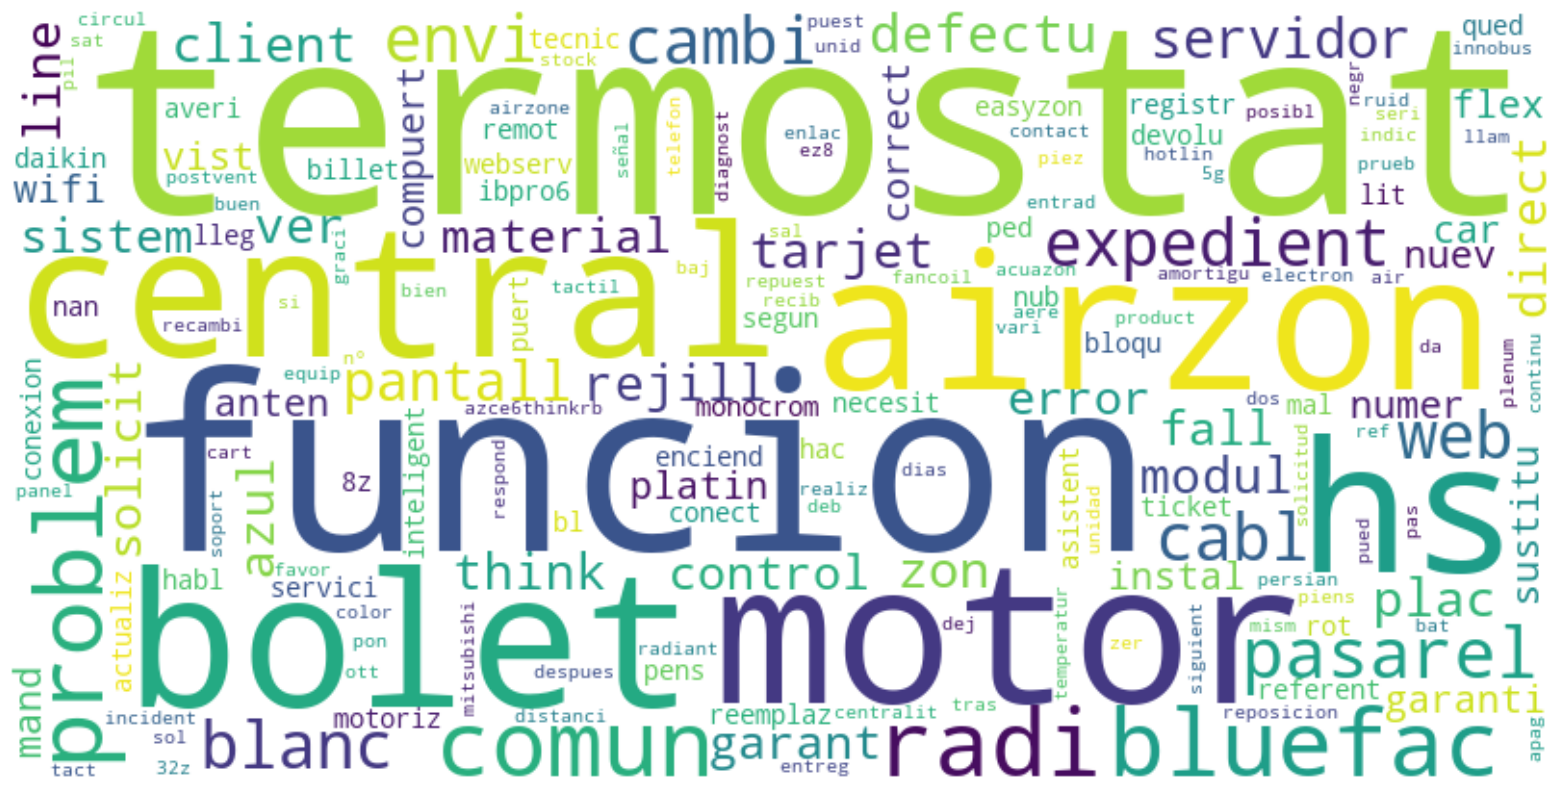

In [289]:
# Create a cloud of words with the most common words
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vector.sum().to_dict())
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

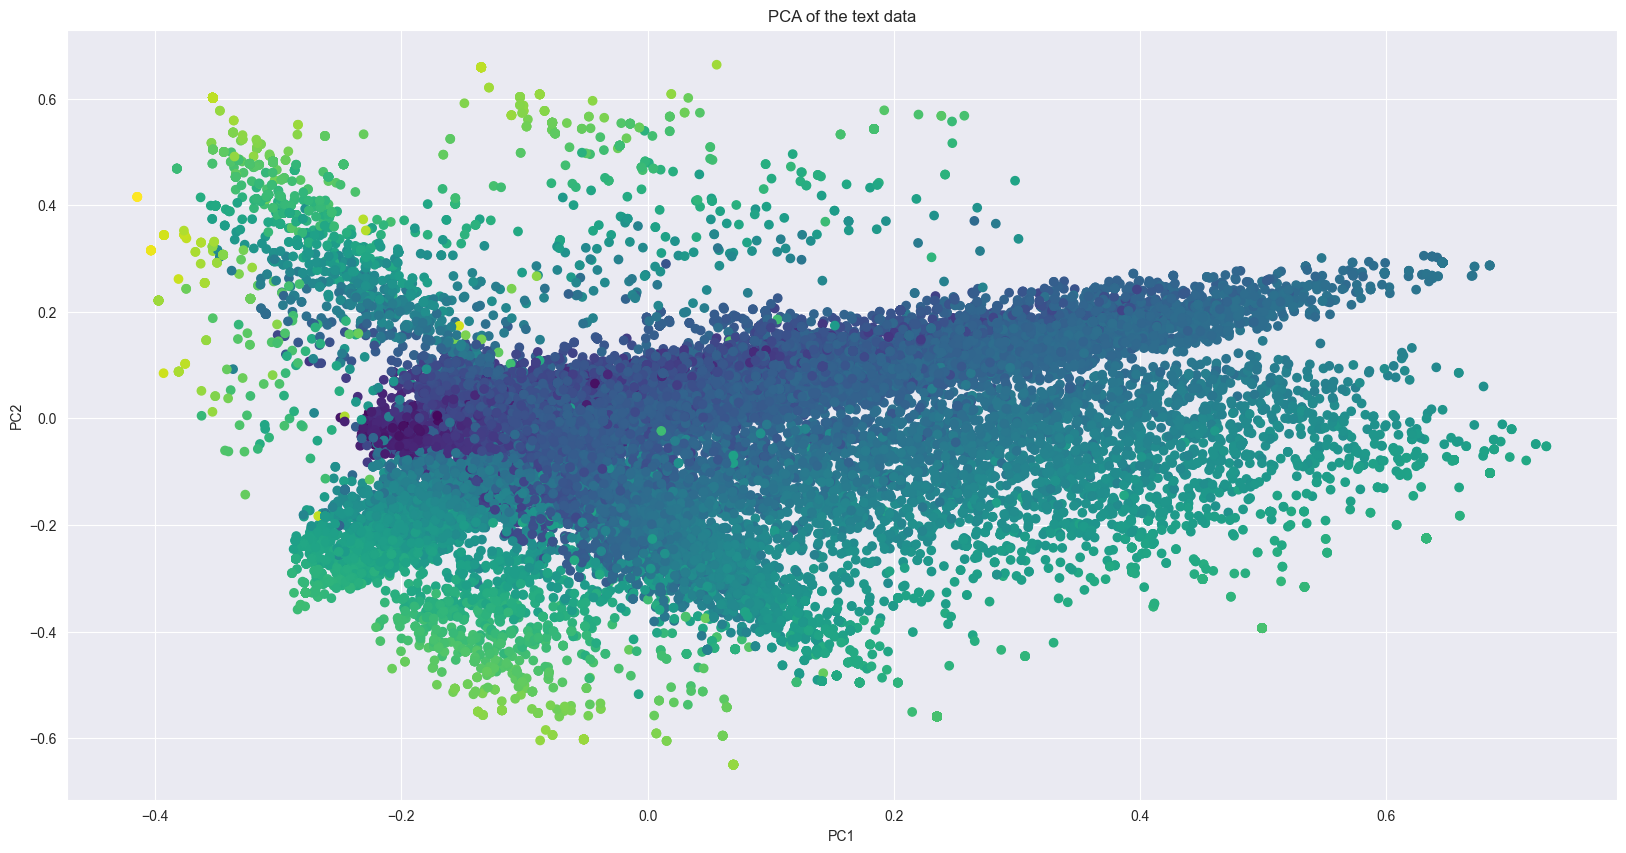

In [310]:
# Use PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_vector = pca.fit_transform(vector)
pca_vector = pd.DataFrame(pca_vector, columns=['PC1', 'PC2', 'PC3'])

plt.figure(figsize=(20, 10))
plt.scatter(pca_vector['PC1'], pca_vector['PC2'], c=pca_vector['PC3'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the text data')
plt.show()

In [306]:
# Plotting in 3D
%matplotlib qt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_vector['PC1'], pca_vector['PC2'], pca_vector['PC3'], c=pca_vector['PC3'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA of the text data')
plt.show()

In [307]:
%matplotlib inline

In [346]:
# Use another dimensionality reduction technique
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_vector = tsne.fit_transform(vector)
tsne_vector = pd.DataFrame(tsne_vector, columns=['TSNE1', 'TSNE2', 'TSNE3'])

In [349]:
%matplotlib qt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_vector['TSNE1'], tsne_vector['TSNE2'], tsne_vector['TSNE3'], c=tsne_vector['TSNE3'], cmap='viridis')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.title('TSNE of the text data')
plt.show()

In [332]:
# Create a sklearn pipeline to apply a clustering algorithm
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('kmeans', KMeans())
])

# Create grid search parameters
parameters = {
    'kmeans__n_clusters': [10, 15, 20, 25, 30, 35, 40, 45, 50]
}

grid_search = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1, verbose=1)
grid_search.fit(vector)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=Pipeline(steps=[('kmeans', KMeans())]), n_jobs=-1,
             param_grid={'kmeans__n_clusters': [10, 15, 20, 25, 30, 35, 40, 45,
                                                50]},
             verbose=1)

In [333]:
# Check the best parameters
grid_search.best_params_

{'kmeans__n_clusters': 45}

In [334]:
# Add the cluster to the dataset
text_to_analyse['cluster'] = grid_search.best_estimator_.predict(vector)

C:\Users\voliveira\AppData\Local\Temp\ipykernel_16932\667776019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse['cluster'] = grid_search.best_estimator_.predict(vector)


In [345]:
# Plot the clusters
%matplotlib qt

# Plotting code
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_vector['PC1'], pca_vector['PC2'], pca_vector['PC3'], c=text_to_analyse['cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA of the text data')
plt.show()

In [350]:
# Plot the clusters
%matplotlib qt

# Plotting code
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_vector['TSNE1'], tsne_vector['TSNE2'], tsne_vector['TSNE3'], c=text_to_analyse['cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA of the text data')
plt.show()

In [336]:
text_to_analyse.head(10)

,desc_problema_translated,descripcion_translated,problema_translated,text_to_analyse,cluster
0,"INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA QUE IBAN A INSTALAR, Y QUE NECESITAN OTRA URGENTEMENTE.\r\nNO CONSIGO HABLAR CON LA PERSONA QUE SABE EL PROBLEMA QUE HA OCURRIDO.",MODULO ALARMAS TECNICAS,INDICAN SE HA ESTROPEADO EN LA INSTALACION Y QUE NECESITAN OTRA URGENTE. NO CONSIGO HABLAR CON LA PERSONA QUE SABE CUAL HA SIDO EL PROBLEMA,"INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA QUE IBAN A INSTALAR, Y QUE NECESITAN OTRA URGENTEMENTE.\r\nNO CONSIGO HABLAR CON LA PERSONA QUE SABE EL PROBLEMA QUE HA OCURRIDO. MODULO ALARMAS TECNICAS INDICAN SE HA ESTROPEADO EN LA INSTALACION Y QUE NECESITAN OTRA URGENTE. NO CONSIGO HABLAR CON LA PERSONA QUE SABE CUAL HA SIDO EL PROBLEMA",10
1,NO FUNCIONA,,NO FUNCIONA,NO FUNCIONA NO FUNCIONA,7
2,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMITE ENCENDER/APAGAR NI SUBIR/BAJAR TEMPERATURA.,,TACTO BLOQUEADO. NO ENCIENDE-APAGA NI DEJA CAMBIAR TEMPERATURA,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMITE ENCENDER/APAGAR NI SUBIR/BAJAR TEMPERATURA. TACTO BLOQUEADO. NO ENCIENDE-APAGA NI DEJA CAMBIAR TEMPERATURA,10
3,"DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANAS, SÓLO BAJAR. HAN COMPROBADO QUE LA ENTRADA DE PULSADOR NO RESPONDE CORRECTAMENTE.",MODELO 2 PERSIANAS,"UNA DE LAS 2 PERSIANAS NO FUNCIONA CON PULSADORES, NO SUBE Y SOLO OBEDECE A LA ORDEN DE BAJADA.\r\nENVIAR MATERIAL, SE RECOGERÁ EL ANTIGUO, CUANDO SE REALICE LA ASISTENCIA PARA LA POSTVENTA QUE HAY PENDIENTE EN MAYO.","DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANAS, SÓLO BAJAR. HAN COMPROBADO QUE LA ENTRADA DE PULSADOR NO RESPONDE CORRECTAMENTE. MODELO 2 PERSIANAS UNA DE LAS 2 PERSIANAS NO FUNCIONA CON PULSADORES, NO SUBE Y SOLO OBEDECE A LA ORDEN DE BAJADA.\r\nENVIAR MATERIAL, SE RECOGERÁ EL ANTIGUO, CUANDO SE REALICE LA ASISTENCIA PARA LA POSTVENTA QUE HAY PENDIENTE EN MAYO.",36
4,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR",,Rafael el viernes llego mi pedido nº 23349 para Jesús Velasco.\r\nUna de las rejillas de 450x150 viene deteriorada y no funciona .\r\nSE SOLICITA REPOSICION DE REJILLA\r\n,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR Rafael el viernes llego mi pedido nº 23349 para Jesús Velasco.\r\nUna de las rejillas de 450x150 viene deteriorada y no funciona .\r\nSE SOLICITA REPOSICION DE REJILLA\r\n",18
5,"MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACIONES.\r\nEN LA INSTALACION DE 24 MODULOS, DABA PROBLEMAS YA QUE EL LED VERDE DEL BUS DE EXPANSION DE LA CENTRAL SE QUEDAAB FIJO, Y LAS ZONAS APARECIAN Y DESAPARECIAN.\r\nQUITANDO ESE MODULO DEL BUS FUNCIONA CORRECTAMENTE.\r\nLO PROBAMOS POR SEPARADO Y YA NI SIQUIERA SE ALIMENTABA.\r\nURGE SALIDA HOY",AZAMFANCOILC,MODULO DE FANCOIL DE ZONA 32Z,"MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACIONES.\r\nEN LA INSTALACION DE 24 MODULOS, DABA PROBLEMAS YA QUE EL LED VERDE DEL BUS DE EXPANSION DE LA CENTRAL SE QUEDAAB FIJO, Y LAS ZONAS APARECIAN Y DESAPARECIAN.\r\nQUITANDO ESE MODULO DEL BUS FUNCIONA CORRECTAMENTE.\r\nLO PROBAMOS POR SEPARADO Y YA NI SIQUIERA SE ALIMENTABA.\r\nURGE SALIDA HOY AZAMFANCOILC MODULO DE FANCOIL DE ZONA 32Z",10
6,MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ DE 12V. HABLADO FRAN CON EL INSTALADOR.\r\nENVIAR URGENTE.,MODULO DE FANCOIL DE ZONA 32Z,"SE DETECTA QUE EL BLUEFACE AL ENCENDERLO, SE QUEDABA CON EL RELOJ Y SE RESETEABA. AL CABO DE UN RATO, YA NI SIQUIERA SE ENCENDIA, SE DETECTA QUE EL BUS DE COMUNICACIONES SACA 7V EN VEZ DE 12V.","MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ DE 12V. HABLADO FRAN CON EL INSTALADOR.\r\nENVIAR URGENTE. MODULO DE FANCOIL DE ZONA 32Z SE DETECTA QUE EL BLUEFACE AL ENCENDERLO, SE QUEDABA CON EL RELOJ Y SE RESETEABA. AL CABO DE UN RATO, YA NI SIQUIERA SE ENCENDIA, SE DETECTA QUE EL BUS DE COMUNICACIONES SACA 7V EN VEZ DE 12V.",10
7,"Error al pedir la pasarela, a última hora hubo un cambio a pasarela SAMSUNG",Pasarela Mitsubishi Heavy,"Error comercial, por cambio de última hora en el modelo de máquina. Cambiar por pasarela AZXEQADAPSAI","Err

In [339]:
text_to_analyse[text_to_analyse['cluster']==1]['problema_translated']

6166                                                 VER EXPEDIENTE N°25941
6297                                                       EXPEDIENTE 26664
6360                                                VER EXPEDIENTE N° 26910
6437                                                VER EXPEDIENTE N° 27352
6451                                                VER EXPEDIENTE N° 27290
                                        ...                                
41486                                                 EXPEDIENTE 1784234417
41742                                                  EXPEDIENTE 240104445
41807                                                  EXPEDIENTE 240105613
42626    CLIENTE DEFECTUOSO PARA CONTACTARLE NÚMERO DE EXPEDIENTE 240300560
43109                                                EXPEDIENTE N°240304780
Name: problema_translated, Length: 311, dtype: object

In [342]:
# Create a temporary column 'temp_index' to assign a unique row identifier within each cluster
text_to_analyse['temp_index'] = text_to_analyse.groupby('cluster').cumcount()

# Pivot the DataFrame
pivoted_df = text_to_analyse.pivot(index='temp_index', columns='cluster', values='text_to_analyse')

# Optionally, if you don't want the multi-level index that comes from pivoting
pivoted_df.columns = [f'Cluster_{int(col)}' for col in pivoted_df.columns]

# Drop the index if it is irrelevant
pivoted_df.reset_index(drop=True, inplace=True)

C:\Users\voliveira\AppData\Local\Temp\ipykernel_16932\1497843397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse['temp_index'] = text_to_analyse.groupby('cluster').cumcount()


In [344]:
pivoted_df.head(50)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_35,Cluster_36,Cluster_37,Cluster_38,Cluster_39,Cluster_40,Cluster_41,Cluster_42,Cluster_43,Cluster_44
0,"EL TERMOSTATO RADIO E QUEDA BLOQUEADO. SE CONFIGURA COMO MAESTRO PERO NO DEJA CAMBIAR MODO. CUANDO SE VA A RESETEAR SE OBSERVA QUE HA TOMADO SISTEMA Nº192. NO DEJA UTILIZAR CURSORES PARA IR A PARAMETRO ZONA. TACTO RADIO BLOQUEADO. TRAMITAR PEDIDO PARA FERNANDO DE LA CRUZ, COMO ASISTENCIA A OBRA. GRACIAS",N°25941 TERMOSTATO IBPRO6 INTELIGENTE COULEUR AIRE VER EXPEDIENTE N°25941,"EL TERMOSTATO AZC3BLUEFECOSB TIENE EL PANEL TACTIL DESPLAZADO DE MODO QUE NO EJECUTAN LAS ORDENES MARCADAS POR EL USUARIO, ENVIAR UNO NUEVO PARA SU SUSTITUCION Y RECOGER DEFECTUOSO BLUEFACE CON PANEL TACTIL DESPLAZADO",SE HAN ROTO LAS TAPAS TRASERAS EN MAS DE UNA OCASION. SOLICITO NOS ENVIEN TERMOSTATOS NUEVOS PARA SU REEMPLAZO. 2 AZC3BLUEFECOSB Y 6 AZC3TACTOCSB. 2 UNIDADES. TAPAS TRASERAS ROTAS EN VARIAS OCASIONES,pb radio suite antena 4G piensa en cable pb radio suite antena 4G,"Error al pedir la pasarela, a última hora hubo un cambio a pasarela SAMSUNG Pasarela Mitsubishi Heavy Error comercial, por cambio de última hora en el modelo de máquina. Cambiar por pasarela AZXEQADAPSAI",Pérdida de com 28:CC:FF:00:07:7E hay que hacer un reset para recuperar las coms pero no es estable Servidor web Nube Ethernet cerca de con,NO FUNCIONA NO FUNCIONA,"INDICA EL CLIENTE, QUE LA TEMPERATURA AMBIENTE DEL BLUEFACE NO SE MUEVE EN VARIOS DÍAS, NI ARRANCANDO EL AIRE Y DEJANDOLO PUESTO UN DIA ENTERO. DICE QUE SOLO SE HA MOVIDO UNA VEZ, QUE LO QUITARON ALIMENTACIÓN Y LO VOLVIERON A DAR. BLUEFACE SUPERFICIE BLANCO SONDA NO MIDE CORRECTAMENTE, SE QUEDA FIJA LA TEMPERATURA AMBIENTE.","TERMOSTATO SE QUEDA SIEMPRE EN ""SCAN"". NO SE VINCULA. MARCA ""SCAN"" TODO EL TIEMPO. NO SE VINCULA.",...,ARCHIVO 4953 CHANTIER GUINAULT OBTENIBLE U140PE1E8A PASARELA DE COMUNICACIÓN AZXEQADAPPSI ENTRE LOS EXPEDIENTE 4953 SITIO DE GUINAULT,"DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANAS, SÓLO BAJAR. HAN COMPROBADO QUE LA ENTRADA DE PULSADOR NO RESPONDE CORRECTAMENTE. MODELO 2 PERSIANAS UNA DE LAS 2 PERSIANAS NO FUNCIONA CON PULSADORES, NO SUBE Y SOLO OBEDECE A LA ORDEN DE BAJADA.\r\nENVIAR MATERIAL, SE RECOGERÁ EL ANTIGUO, CUANDO SE REALICE LA ASISTENCIA PARA LA POSTVENTA QUE HAY PENDIENTE EN MAYO.","En este webserverapp estuve yo, Fran Garcia y Fran Delgado, porque da problemas por el repetidor.\r\nSolicito WScloud wifi para sustituir. WS NUBE WIFI para sustituir un wsapp wifi con problemas,","1) Para asistencia MASSAS que ha cambiado a Naranja y con una APP hay que cambiar la configuración del puerto, por lo tanto decidimos cambiar el WS a Cloud por la simplicidad de la instalación.\n2) Y otros para stock xxxx-- para MASSAS",PANTALLA TACTIL NO VA BIEN. PANTALLA TACTIL NO FUNCIONA CORRECTAMENTE.,"INSTALACION CON PROBLEMAS DE CONEXION EN EL WEBSERVER. NOS INTERESA QUE TENGA EL CLOUD PORQUE SU PADRE ES CONSTRUCTOR Y VAMOS A HACER ALGUNOS PROYECTOS CON ELLOS. POR FAVOR, ENVIAD AZXWSCLOUDWIFI Y YO DEVUELVO EL OTRO. ENVIO DE AZXWSCLOUDWIFI PARA ASISTENCIA A OBRA EL MARTES 16 DE JUNIO. FERNANDO RETIRA EL ANTIGUO Y LO ENVÍA A MALAGA",ACTUALIZACIÓN DEL SISTEMA DE DEMOSTRACIÓN CABLE LITE,EL TERMOSTATO RECIBIDO REACONDICIONADO DE NUESTRO PEDIDO 72619 NO FUNCIONA. EL SÍMBOLO DE ESCANEO NO APARECE EN LA PANTALLA CON UNA BATERÍA NUEVA.\r\nCONSULTA TU CORREO ELECTRÓNICO EN PJ PARA VALIDACIÓN DE LA GARANTÍA DE UN ZONAFLEXB EL SÍMBOLO DE ESCANEO NO APARECE EN LA PANTALLA CON UNA BATERÍA NUEVA,"3Ud MINT Y 1 Ud MAIR, ruido al cerrar (crac, crac..). Reponer, es la vivienda del hijo del instalador. Motor rejilla inteligente doble Ruido al cerrar",ABRIR ARCHIVO LÍNEA DIRECTA 3856\r\nPROBLEMA EN EL PAQUETE DE RADIO ESS PERDA07M5\r\nTERMOSTATO A SUSTITUIR S./G AZC3TACTORSB TERMOSTATO DE ZONA ARCHIVO DE SUITE TÉCNICO ABRIR LÍNEA DIRECTA DESPUÉS DEL DIAGNÓSTICO 3856
1,"EL TERMOSTATO RADIO E QUEDA BLOQ